In [19]:
import os
import random
import numpy as np
import sys
import torch
import pprint

root = '/'
pprint.pprint(sys.path)

import_path = root + 'pigvae_all'
sys.path.append(import_path)
pprint.pprint(sys.path)

['/project/dsc-is/daiki-ko/Graph-Data_for_MCMC',
 '/opt/anaconda3/lib/python38.zip',
 '/opt/anaconda3/lib/python3.8',
 '/opt/anaconda3/lib/python3.8/lib-dynload',
 '',
 '/home/is/daiki-ko/.local/lib/python3.8/site-packages',
 '/opt/anaconda3/lib/python3.8/site-packages',
 '/opt/anaconda3/lib/python3.8/site-packages/locket-0.2.1-py3.8.egg',
 '/opt/anaconda3/lib/python3.8/site-packages/IPython/extensions',
 '/home/is/daiki-ko/.ipython',
 '/project/dsc-is/daiki-ko/pigvae_all']
['/project/dsc-is/daiki-ko/Graph-Data_for_MCMC',
 '/opt/anaconda3/lib/python38.zip',
 '/opt/anaconda3/lib/python3.8',
 '/opt/anaconda3/lib/python3.8/lib-dynload',
 '',
 '/home/is/daiki-ko/.local/lib/python3.8/site-packages',
 '/opt/anaconda3/lib/python3.8/site-packages',
 '/opt/anaconda3/lib/python3.8/site-packages/locket-0.2.1-py3.8.egg',
 '/opt/anaconda3/lib/python3.8/site-packages/IPython/extensions',
 '/home/is/daiki-ko/.ipython',
 '/project/dsc-is/daiki-ko/pigvae_all',
 '/project/dsc-is/daiki-ko/pigvae_all']


In [20]:
#from mol2graph.py

max_num_nodes = 26

possible_atom_list = [
          'Si', 'C', 'N', 'S', 'P', 'O', 'F', 'Cl', 'Br', 'I', 'B'
      ]

# BACE1

In [11]:
import pandas as pd

mol_table = pd.read_csv(import_path + "/small_datasets/bace1.csv")

In [12]:
smiles_list = []

for id, smi in enumerate(mol_table["SMILES"].tolist()):
  
    if " " in smi:
        print(id, smi)
        smi = smi.replace(' ', '')

    smiles_list.append(smi)

In [13]:
len(smiles_list)

3654

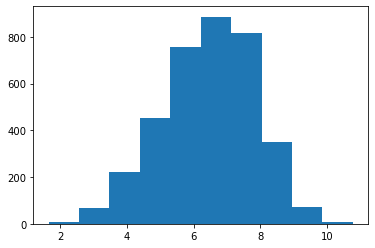

In [14]:
import matplotlib.pyplot as plt

target_list = mol_table['pXC50'].tolist()

plt.hist(target_list)
plt.show()

In [15]:
from rdkit import Chem
import math

all_smiles = []
all_props = []

for id, (smi, t) in enumerate(zip(smiles_list, target_list)):

    mol = Chem.MolFromSmiles(smi)
    
    in_flag = True
    
    if mol is not None: 
        for atom in mol.GetAtoms():
        
            if atom.GetSymbol() not in possible_atom_list:
            
                in_flag = False

    if mol is not None and math.isnan(t) != True and in_flag == True and mol.GetNumAtoms() <= max_num_nodes:
        print(id, t)
        all_smiles.append(smi)
        all_props.append(t)

0 3.29
1 3.11
2 3.52
3 3.06
4 3.0
5 3.66
6 2.99
7 3.51
8 3.11
9 3.46
10 3.53
11 5.03012
12 3.85
13 3.82
14 4.22
15 3.03
16 3.01
17 2.96
18 3.38
19 3.18
20 3.11
21 4.66
22 5.05
23 4.82
24 2.41
25 3.49
26 3.11
27 3.07
28 3.29
29 4.49
30 2.54
31 3.0
32 4.41
33 3.32
34 5.7
35 4.39
36 4.97
37 4.97
38 2.7
39 4.1
40 4.8
41 4.6
42 4.41
43 4.7
44 5.26
45 5.97
46 3.61
47 4.65
48 4.52
49 3.7
50 4.47
51 5.14
52 4.03
53 4.9
54 4.41
55 3.66
56 4.07
57 4.42
58 4.7
59 4.94
60 5.09
61 4.79
62 4.79
63 3.16
64 6.00436
65 5.37
66 4.83
67 6.57
68 2.84
69 4.48
70 5.04096
71 5.572
72 3.69
73 7.4
74 5.47
75 3.74
76 5.1
77 4.0
78 2.46
79 4.8
80 5.46
81 4.57
82 3.89
83 4.54
84 5.67
85 4.99
86 5.12
87 6.15
88 2.72
89 4.87
90 6.26
91 3.35
92 4.0
93 5.08
94 6.24
95 5.46
96 5.41
97 2.54
98 4.96
99 5.66
100 4.67
101 3.69
102 5.19
103 4.29
105 4.43
106 6.10237
107 4.98
108 4.49
109 5.41
110 3.71
111 4.0
112 5.49485
113 5.02
114 4.6
115 4.42
116 4.82
117 5.76447
118 5.27
120 4.91
121 5.47
122 3.7
123 4.4
124 2.95
125 

In [16]:
len(all_smiles)

502

In [17]:
data_save_dir = root + "dataset/eval_dataset/molecular_properties/zinc/smiles/bace/"

if not os.path.exists(data_save_dir):
    os.makedirs(data_save_dir)
    
np.save(data_save_dir + "all_smiles", np.array(all_smiles))
np.save(data_save_dir + "all_ys", np.array(all_props))

# CTSD

In [22]:
import pandas as pd

#mol_table = pd.read_csv("smiles_feature.csv")
mol_table = pd.read_csv(import_path + "/small_datasets/ctsd.csv")

In [23]:
smiles_list = []

for id, smi in enumerate(mol_table["SMILES"].tolist()):
  
    if " " in smi:
        print(id, smi)
        smi = smi.replace(' ', '')

    smiles_list.append(smi)

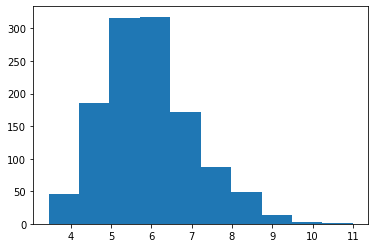

In [24]:
import matplotlib.pyplot as plt

target_list = mol_table['pXC50'].tolist()

plt.hist(target_list)
plt.show()

In [25]:
from rdkit import Chem
import math

all_smiles = []
all_props = []

for id, (smi, t) in enumerate(zip(smiles_list, target_list)):

    mol = Chem.MolFromSmiles(smi)
    
    in_flag = True
    
    if mol is not None: 
        for atom in mol.GetAtoms():
        
            if atom.GetSymbol() not in possible_atom_list:
            
                in_flag = False

    if mol is not None and math.isnan(t) != True and in_flag == True and mol.GetNumAtoms() <= max_num_nodes:
        print(id, t)
        all_smiles.append(smi)
        all_props.append(t)

0 3.69
1 4.62
2 4.16
3 4.09
4 3.69
5 6.13077
6 4.42
7 4.57
8 3.93
9 4.01
10 4.41
11 5.01
12 4.37
13 4.53
14 4.35
15 4.56
16 4.77
17 5.55
18 4.22
19 4.85
20 4.5
21 4.48
22 4.22
23 3.93
24 3.45
25 4.5
28 3.91
29 5.43074
30 4.42
31 3.82
32 4.52
33 4.81
34 5.6
35 6.39362
36 4.93
37 5.09173
38 4.31
39 4.66
41 4.58
43 4.28
46 5.06495
48 5.51258
49 4.05
50 5.79425
51 4.62
53 5.53
54 4.52
55 4.83
57 5.36
58 5.75449
60 4.38
61 4.55
62 6.13371
64 3.59
65 4.35
66 4.5
70 4.3
71 5.17005
72 4.89
73 4.99
74 5.1
76 4.5
77 4.33
80 4.85
81 4.65
87 4.41
103 4.26
112 5.64
121 6.00436
128 5.78
137 5.04412
146 5.29
153 4.52
174 3.52
177 4.68
178 4.87
191 3.77
192 4.82
234 4.12
253 5.77
273 4.02
303 4.92
304 3.92
317 4.24


In [26]:
len(all_smiles)

84

In [27]:
data_save_dir = root + "dataset/eval_dataset/molecular_properties/zinc/smiles/ctsd/"

if not os.path.exists(data_save_dir):
    os.makedirs(data_save_dir)
    
np.save(data_save_dir + "all_smiles", np.array(all_smiles))
np.save(data_save_dir + "all_ys", np.array(all_props))

# MMP2

In [10]:
import pandas as pd

mol_table = pd.read_csv(import_path + "/small_datasets/mmp2.csv")

In [11]:
mol_table.head()

In [12]:
smiles_list = []

for id, smi in enumerate(mol_table["SMILES"].tolist()):
  
    if " " in smi:
        print(id, smi)
        smi = smi.replace(' ', '')

    smiles_list.append(smi)

In [13]:
import matplotlib.pyplot as plt

target_list = mol_table['pXC50'].tolist()

plt.hist(target_list)
plt.show()

In [14]:
from rdkit import Chem
import math

all_smiles = []
all_props = []

for id, (smi, t) in enumerate(zip(smiles_list, target_list)):

    mol = Chem.MolFromSmiles(smi)
    
    in_flag = True
    
    if mol is not None: 
        for atom in mol.GetAtoms():
        
            if atom.GetSymbol() not in possible_atom_list:
            
                in_flag = False

    if mol is not None and math.isnan(t) != True and in_flag == True and mol.GetNumAtoms() <= max_num_nodes:
        print(id, t)
        all_smiles.append(smi)
        all_props.append(t)

In [15]:
len(all_smiles)

In [16]:
data_save_dir = root + "dataset/eval_dataset/molecular_properties/zinc/smiles/mmp2/"

if not os.path.exists(data_save_dir):
    os.makedirs(data_save_dir)
    
np.save(data_save_dir + "all_smiles", np.array(all_smiles))
np.save(data_save_dir + "all_ys", np.array(all_props))

# Malaria

In [30]:
mol_table = pd.read_csv(import_path + "/small_datasets/malaria-processed.csv")

In [31]:
smiles_list = []

for id, smi in enumerate(mol_table["smiles"].tolist()):
  
    if " " in smi:
        print(id, smi)
        smi = smi.replace(' ', '')

    smiles_list.append(smi)

In [32]:
import matplotlib.pyplot as plt

target_list = mol_table['activity'].tolist()

plt.hist(target_list)
plt.show()

In [33]:
from rdkit import Chem
import math

all_smiles = []
all_props = []

for id, (smi, t) in enumerate(zip(smiles_list, target_list)):

    mol = Chem.MolFromSmiles(smi)
    
    in_flag = True
    
    if mol is not None: 
        for atom in mol.GetAtoms():
        
            if atom.GetSymbol() not in possible_atom_list:
            
                in_flag = False

    if mol is not None and math.isnan(t) != True and in_flag == True and mol.GetNumAtoms() <= max_num_nodes:
        print(id, t)
        all_smiles.append(smi)
        all_props.append(t)

In [34]:
len(all_smiles)

In [35]:
data_save_dir = root + "dataset/eval_dataset/molecular_properties/zinc/smiles/malaria/"

if not os.path.exists(data_save_dir):
    os.makedirs(data_save_dir)
    
np.save(data_save_dir + "all_smiles", np.array(all_smiles))
np.save(data_save_dir + "all_ys", np.array(all_props))

# Delaney-Solubility

In [36]:
import pandas as pd

#mol_table = pd.read_csv("smiles_feature.csv")
mol_table = pd.read_csv(import_path + "/small_datasets/delaney-processed.csv")

In [37]:
smiles_list = []

for id, smi in enumerate(mol_table["smiles"].tolist()):
  
    if " " in smi:
        print(id, smi)
        smi = smi.replace(' ', '')

    smiles_list.append(smi)

In [38]:
import matplotlib.pyplot as plt

target_list = mol_table['measured log solubility in mols per litre'].tolist()

plt.hist(target_list)
plt.show()

In [39]:
from rdkit import Chem
import math

all_smiles = []
all_props = []

for id, (smi, t) in enumerate(zip(smiles_list, target_list)):

    mol = Chem.MolFromSmiles(smi)
    
    in_flag = True
    
    if mol is not None: 
        for atom in mol.GetAtoms():
        
            if atom.GetSymbol() not in possible_atom_list:
            
                in_flag = False

    if mol is not None and math.isnan(t) != True and in_flag == True and mol.GetNumAtoms() <= max_num_nodes:
        print(id, t)
        all_smiles.append(smi)
        all_props.append(t)

In [40]:
len(all_smiles)

In [41]:
data_save_dir = root + "dataset/eval_dataset/molecular_properties/zinc/smiles/esol/"

if not os.path.exists(data_save_dir):
    os.makedirs(data_save_dir)
    
np.save(data_save_dir + "all_smiles", np.array(all_smiles))
np.save(data_save_dir + "all_ys", np.array(all_props))

# FreeSolv

In [42]:
import pandas as pd

mol_table = pd.read_csv(import_path + "/small_datasets/FreeSolv.csv")

In [43]:
smiles_list = []

for id, smi in enumerate(mol_table["smiles"].tolist()):
  
    if " " in smi:
        print(id, smi)
        smi = smi.replace(' ', '')

    smiles_list.append(smi)

In [44]:
import matplotlib.pyplot as plt

target_list = mol_table['expt'].tolist()

plt.hist(target_list)
plt.show()

In [45]:
from rdkit import Chem
import math

all_smiles = []
all_props = []

for id, (smi, t) in enumerate(zip(smiles_list, target_list)):

    mol = Chem.MolFromSmiles(smi)
    
    in_flag = True
    
    if mol is not None: 
        for atom in mol.GetAtoms():
        
            if atom.GetSymbol() not in possible_atom_list:
            
                in_flag = False

    if mol is not None and math.isnan(t) != True and in_flag == True and mol.GetNumAtoms() <= max_num_nodes:
        print(id, t)
        all_smiles.append(smi)
        all_props.append(t)

In [46]:
len(all_smiles)

In [47]:
data_save_dir = root + "dataset/eval_dataset/molecular_properties/zinc/smiles/freesolv/"

if not os.path.exists(data_save_dir):
    os.makedirs(data_save_dir)
    
np.save(data_save_dir + "all_smiles", np.array(all_smiles))
np.save(data_save_dir + "all_ys", np.array(all_props))

# Lipophilicity

In [48]:
import pandas as pd

mol_table = pd.read_csv(import_path + "/small_datasets/Lipo.csv")

In [49]:
smiles_list = []

for id, smi in enumerate(mol_table["smiles"].tolist()):
  
    if " " in smi:
        print(id, smi)
        smi = smi.replace(' ', '')

    smiles_list.append(smi)

In [50]:
import matplotlib.pyplot as plt

target_list = mol_table['exp'].tolist()

plt.hist(target_list)
plt.show()

In [51]:
from rdkit import Chem
import math

all_smiles = []
all_props = []

for id, (smi, t) in enumerate(zip(smiles_list, target_list)):

    mol = Chem.MolFromSmiles(smi)
    
    in_flag = True
    
    if mol is not None: 
        for atom in mol.GetAtoms():
        
            if atom.GetSymbol() not in possible_atom_list:
            
                in_flag = False

    if mol is not None and math.isnan(t) != True and in_flag == True and mol.GetNumAtoms() <= max_num_nodes:
        print(id, t)
        all_smiles.append(smi)
        all_props.append(t)

In [52]:
len(all_smiles)

In [53]:
data_save_dir = root + "dataset/eval_dataset/molecular_properties/zinc/smiles/lipo/"

if not os.path.exists(data_save_dir):
    os.makedirs(data_save_dir)
    
np.save(data_save_dir + "all_smiles", np.array(all_smiles))
np.save(data_save_dir + "all_ys", np.array(all_props))

# LogP from ZINC dataset

In [4]:
import numpy as np
import pandas as pd

data_dir = root + 'dataset/MolData/ZINC/'
data_path = data_dir + "zinc15_250K_2D.csv"

zinc_df = pd.read_csv(data_path)

In [6]:
zinc_smiles = zinc_df["smiles"].tolist()
target_list = zinc_df["logp"].tolist()

In [7]:
import random
l = list(range(0,250000))

In [8]:
indices = random.sample(l, 100000)

In [9]:
from rdkit import Chem
import math

all_smiles = []
all_props = []

for id, (smi, t) in enumerate(zip(np.array(zinc_smiles)[indices], np.array(target_list)[indices])):

    mol = Chem.MolFromSmiles(smi)
    
    in_flag = True
    
    if mol is not None: 
        for atom in mol.GetAtoms():
        
            if atom.GetSymbol() not in possible_atom_list:
            
                in_flag = False

    if mol is not None and math.isnan(t) != True and in_flag == True and mol.GetNumAtoms() <= max_num_nodes:
        print(id, t)
        all_smiles.append(smi)
        all_props.append(t)

In [10]:
len(all_smiles), len(all_props)

In [11]:
data_save_dir = root + "dataset/eval_dataset/molecular_properties/zinc/smiles/logp/"

if not os.path.exists(data_save_dir):
    os.makedirs(data_save_dir)
    
np.save(data_save_dir + "all_smiles", np.array(all_smiles))
np.save(data_save_dir + "all_ys", np.array(all_props))
np.save(data_save_dir + "shuffle_indices", np.array(indices))